In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.colors as mcolors


In [ ]:
DATASET_NAME = "dataset"
MODEL_NAME = 'VanillaCNN'
DATASET_VAR = 'base_final'
MODEL_PATH = f'./models/{MODEL_NAME}'

In [12]:
results = np.load(f'{MODEL_PATH}/{DATASET_VAR}/results.npz')
y_true = results['y_true']
y_pred = results['y_pred']
y_pred_proba = results['y_pred_proba']
class_names = results['class_names']

# Classification report

In [14]:
from sklearn.metrics import classification_report
import pandas as pd
from io import StringIO

clf_report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True, zero_division=0)
clf_report_df = pd.read_json(StringIO(json.dumps(clf_report)), orient='index')
clf_report_df

,precision,recall,f1-score,support
Aeroplane,0.000000,0.000000,0.000000,22
Muscicapa striata_Spotted Flycatcher,0.000000,0.000000,0.000000,173
Periparus ater_Coal Tit,0.854167,0.377880,0.523962,217
Cuculus canorus_Common Cuckoo,0.000000,0.000000,0.000000,3
Regulus regulus_Goldcrest,0.673469,0.242647,0.356757,136
Anthus trivialis_Tree Pipit,0.968944,0.816754,0.886364,191
Vegetation,0.818182,0.166667,0.276923,54
Troglodytes troglodytes_Eurasian Wren,0.335025,0.312796,0.323529,211
Erithacus rubecula_European Robin,0.693878,0.197101,0.306998,690
None,0.790018,0.767243,0.778464,4683


# ROC AUC Curve

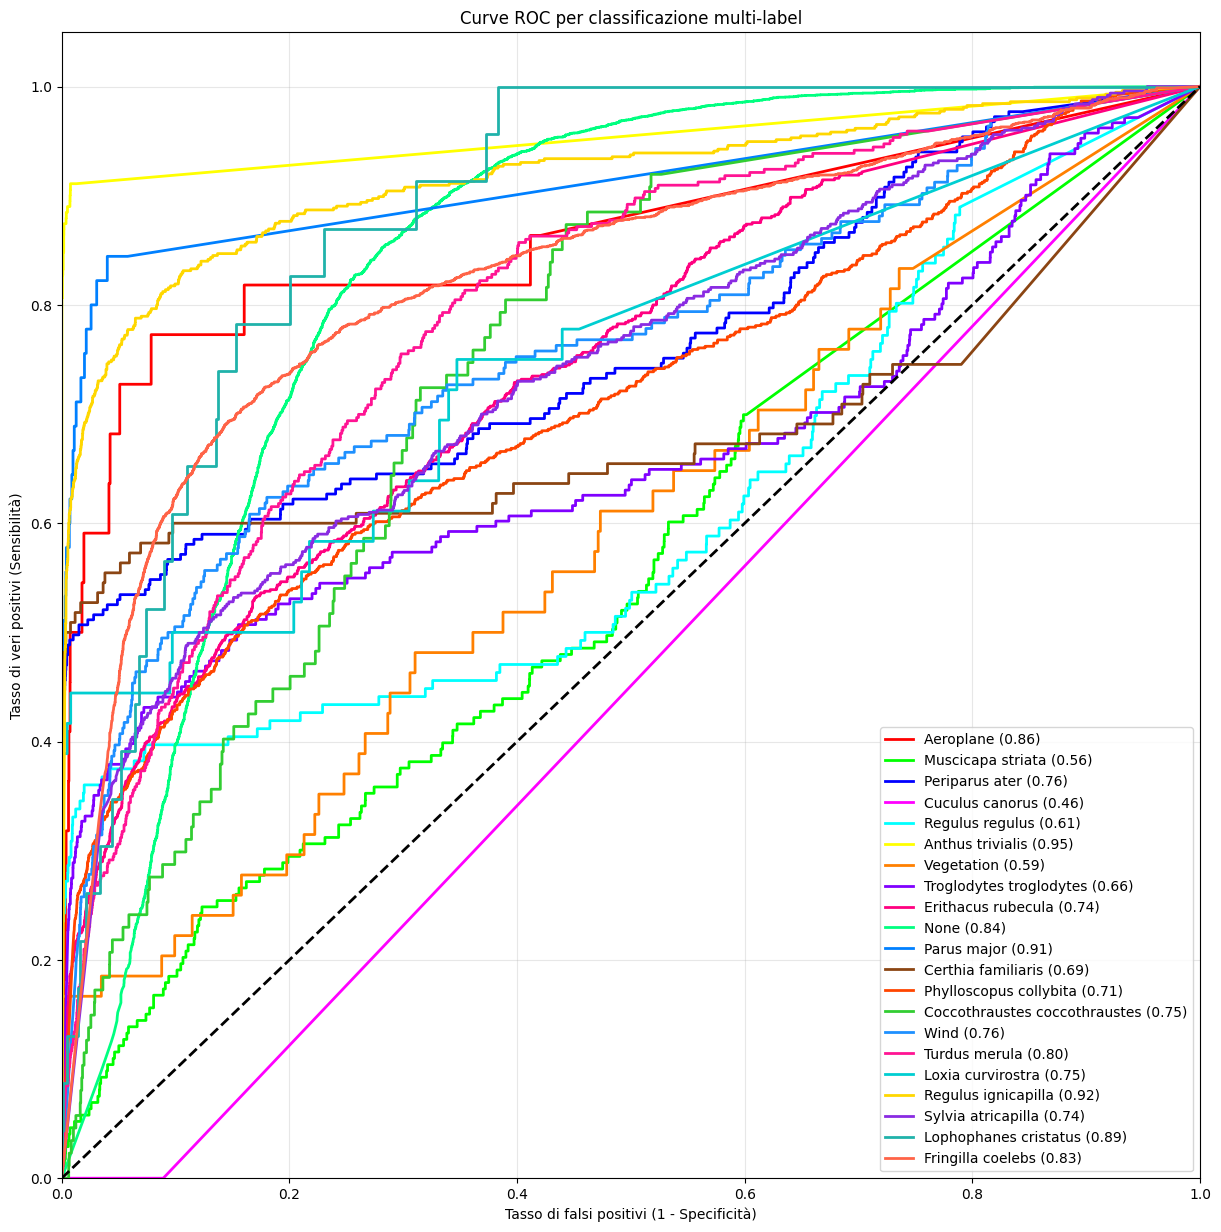

In [13]:
def plot_roc_curves(y_true, y_pred_proba, class_names=None, selected_classes=None):
    """
    Disegna le curve ROC per ogni classe in un problema di classificazione multi-label.
    
    Parameters:
    -----------
    y_true : array, shape = (n_samples, n_classes)
        Etichette vere in formato one-hot encoding (0 o 1)
    y_pred_proba : array, shape = (n_samples, n_classes)
        Probabilità predette per ogni classe
    class_names : list, optional
        Lista di nomi delle classi (se None, usa indici numerici)
    selected_classes : list, optional
        Lista di indici delle classi da visualizzare (se None, mostra tutte)
    """
    n_classes = y_true.shape[1]
    
    # Se non sono specificate classi selezionate, uso tutte le classi
    if selected_classes is None:
        selected_classes = list(range(n_classes))
    
    # Se non sono specificati nomi delle classi, uso indici numerici
    if class_names is None:
        class_names = [f"classe {i}" for i in range(n_classes)]
    
    # Genero un dizionario di colori fissi per ogni classe
    # Utilizzo 20 colori iniziali e li ripeto se necessario
    bright_colors = [
        '#FF0000',  # Rosso acceso
        '#00FF00',  # Verde lime
        '#0000FF',  # Blu elettrico
        '#FF00FF',  # Magenta
        '#00FFFF',  # Cyan
        '#FFFF00',  # Giallo
        '#FF8000',  # Arancione
        '#8000FF',  # Viola
        '#FF0080',  # Rosa acceso
        '#00FF80',  # Verde acqua
        '#0080FF',  # Azzurro
        '#8B4513',  # Marrone
        '#FF4500',  # Rosso-arancio
        '#32CD32',  # Verde lime scuro
        '#1E90FF',  # Blu dodger
        '#FF1493',  # Rosa profondo
        '#00CED1',  # Turchese scuro
        '#FFD700',  # Oro
        '#8A2BE2',  # Blu viola
        '#20B2AA',  # Verde mare chiaro
        '#FF6347',  # Pomodoro
        '#4169E1',  # Blu reale
        '#9ACD32',  # Giallo verde
        '#BA55D3',  # Orchidea medio
        '#2E8B57',  # Verde mare
        '#D2691E',  # Cioccolato
        '#6A5ACD',  # Blu ardesia
        '#DC143C',  # Cremisi
        '#00FA9A',  # Verde primavera medio
        '#4B0082',  # Indaco
    ]
    
    # Utilizzo la palette personalizzata e, se necessario, aggiungo altri colori da TABLEAU
    if n_classes > len(bright_colors):
        additional_colors = list(mcolors.TABLEAU_COLORS)
        all_colors = bright_colors + additional_colors
    else:
        all_colors = bright_colors
        
    color_dict = {i: all_colors[i % len(all_colors)] for i in range(n_classes)}
    
    # Preparo il grafico
    plt.figure(figsize=(12, 12))
    
    # Calcolo e disegno le curve ROC solo per le classi selezionate
    for i in selected_classes:
        if i < n_classes:  # Verifico che l'indice sia valido
            fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, color=color_dict[i],
                     label=f'{class_names[i].split("_")[0]} ({roc_auc:.2f})')
    
    # Aggiungo la linea diagonale di riferimento (classificatore casuale)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.tight_layout()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasso di falsi positivi (1 - Specificità)')
    plt.ylabel('Tasso di veri positivi (Sensibilità)')
    plt.title('Curve ROC per classificazione multi-label')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

plot_roc_curves(y_true, y_pred_proba, class_names=class_names)



# Confusion Matrix

In [15]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_true, y_pred)

conf_matrices = []
for idx, label in enumerate(class_names):
    tn, fp, fn, tp = mcm[idx].ravel()
    conf_matrices.append({
        'Class': label,
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn
    })

conf_df = pd.DataFrame(conf_matrices)
conf_df

,Class,TP,FP,FN,TN
0,Aeroplane,0,0,22,8953
1,Muscicapa striata_Spotted Flycatcher,0,3,173,8799
2,Periparus ater_Coal Tit,82,14,135,8744
3,Cuculus canorus_Common Cuckoo,0,0,3,8972
4,Regulus regulus_Goldcrest,33,16,103,8823
5,Anthus trivialis_Tree Pipit,156,5,35,8779
6,Vegetation,9,2,45,8919
7,Troglodytes troglodytes_Eurasian Wren,66,131,145,8633
8,Erithacus rubecula_European Robin,136,60,554,8225
9,None,3593,955,1090,3337
